In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
from itertools import combinations

In [5]:
df = pd.read_csv("negative_slopes.csv")
#Pivot wider: makes each filter its own column
wide = df.pivot(index="SN Name", columns="Filter", values="Slope")
# Desired order of filters
filter_order = ["UVW2", "UVM2", "UVW1", "U", "B", "V"]
# Reorder only those that exist in the DataFrame
wide = wide.reindex(columns=[f for f in filter_order if f in wide.columns])
# renaming columns to add '_slope' at the end
wide = wide.rename(columns={f: f"{f}_slope" for f in wide.columns})
wide.head()

wide.to_csv("negative_slopes_wide.csv", index=True) #saving new csv


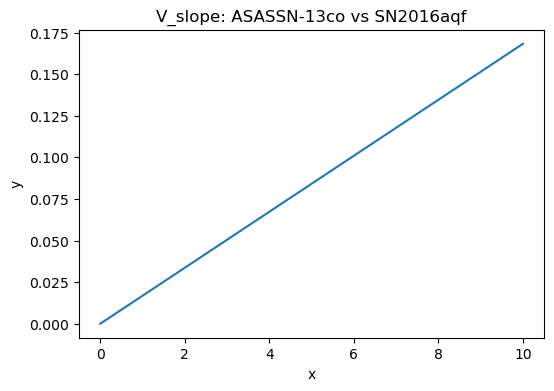

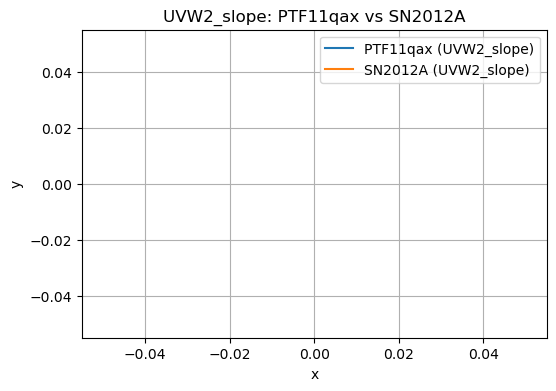

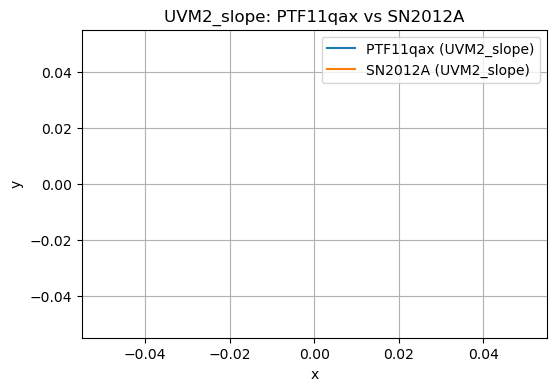

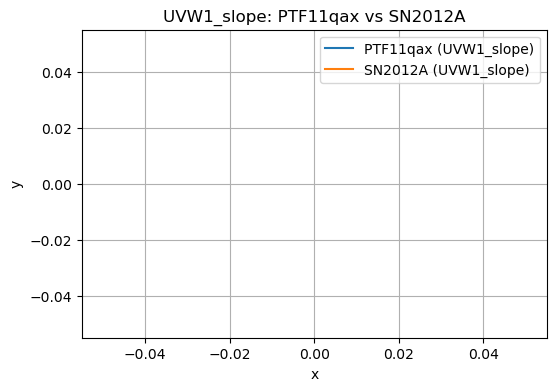

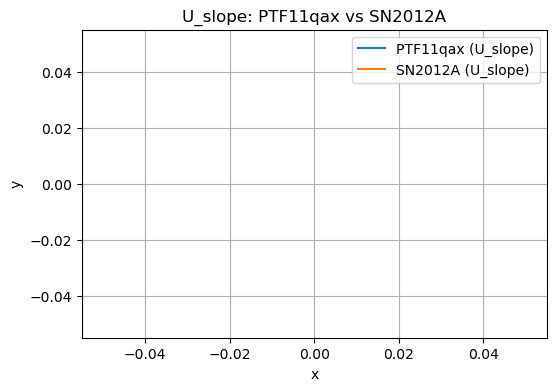

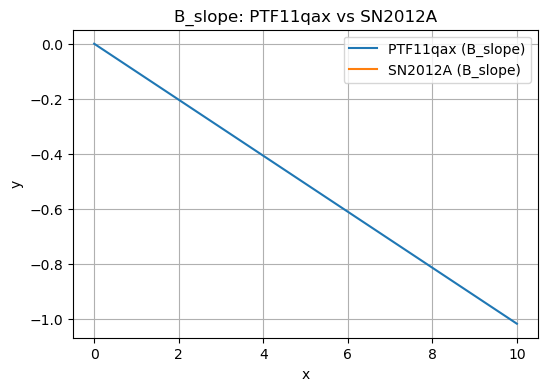

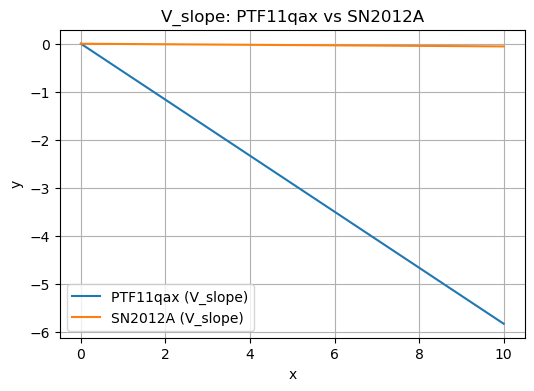

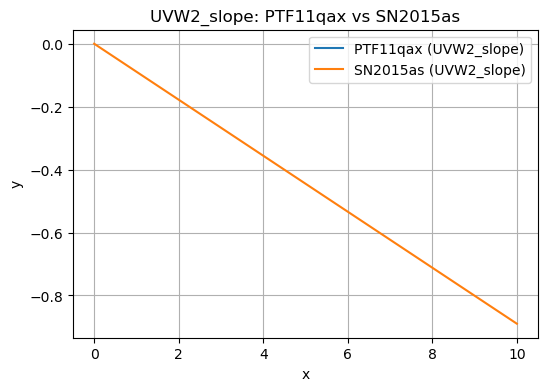

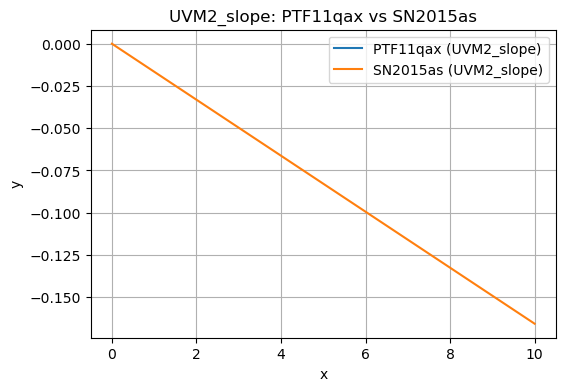

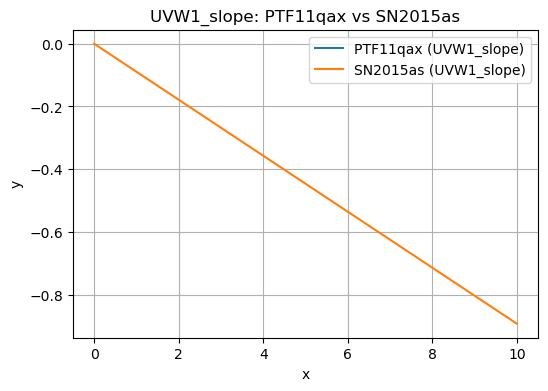

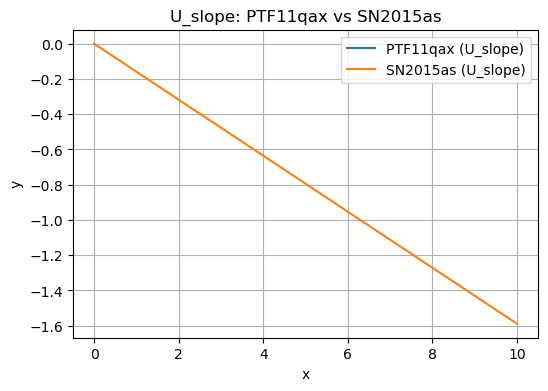

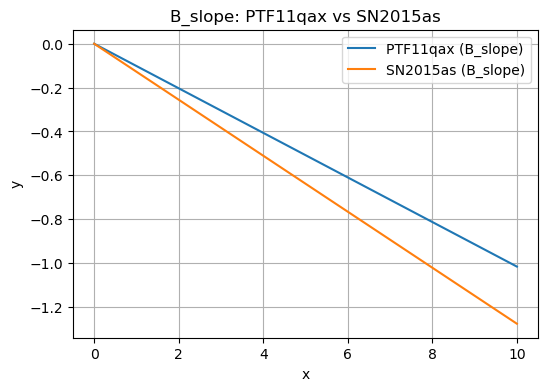

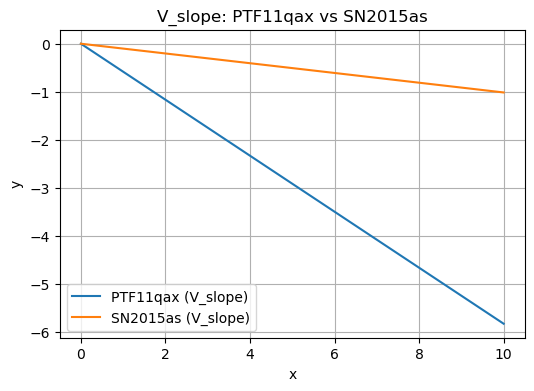

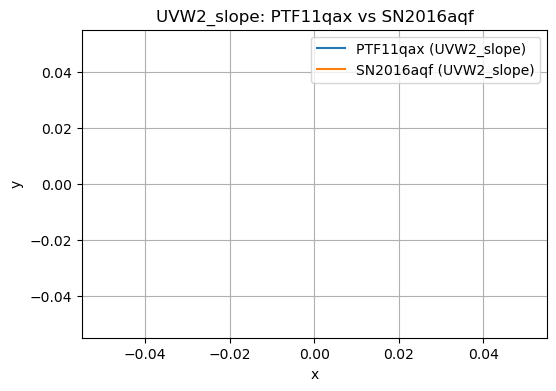

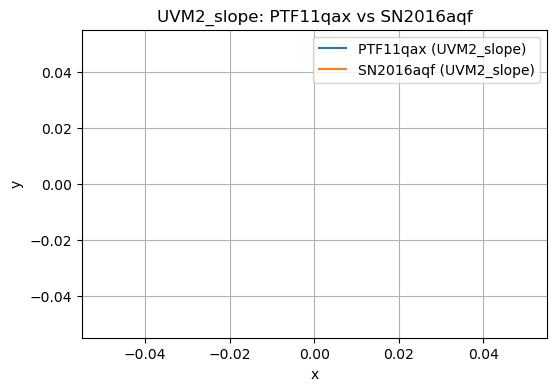

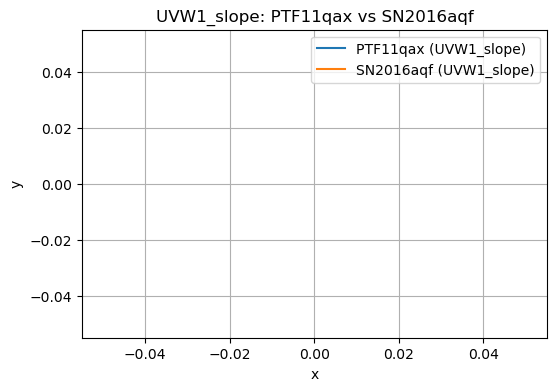

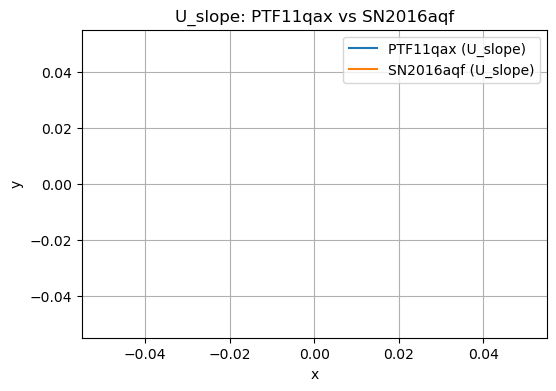

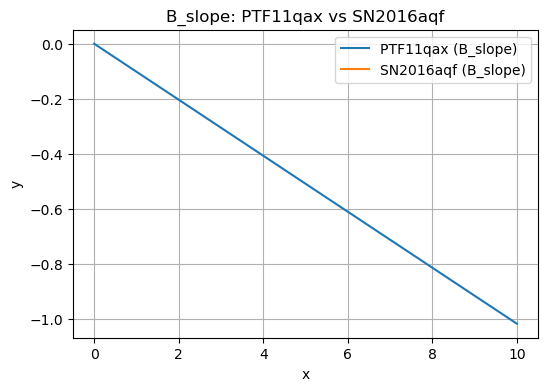

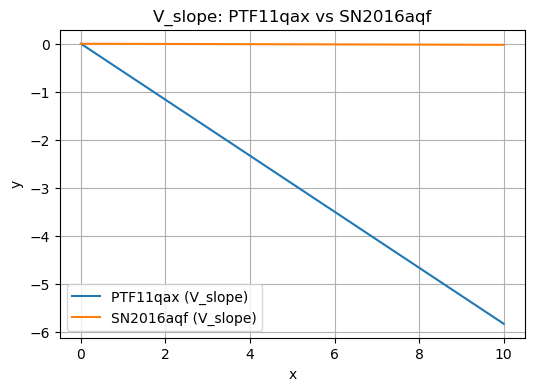

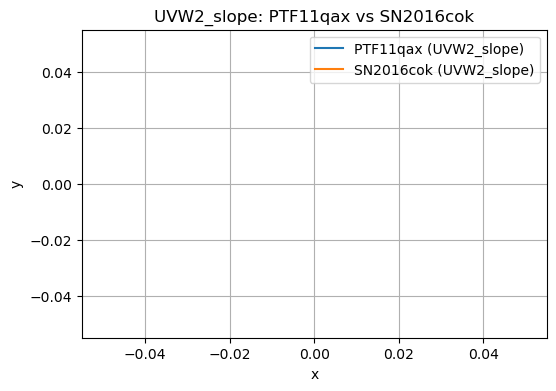

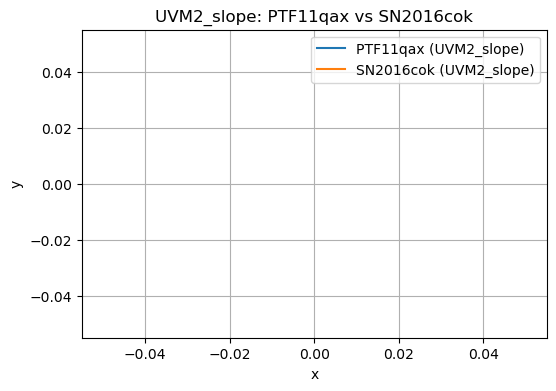

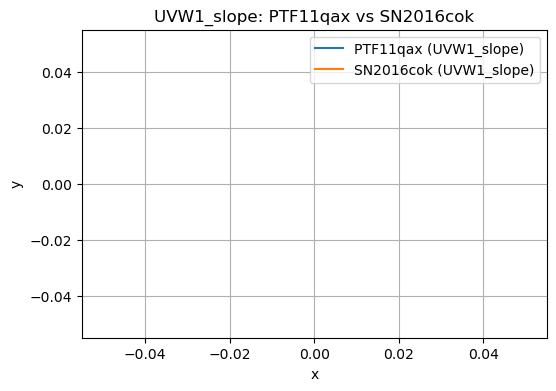

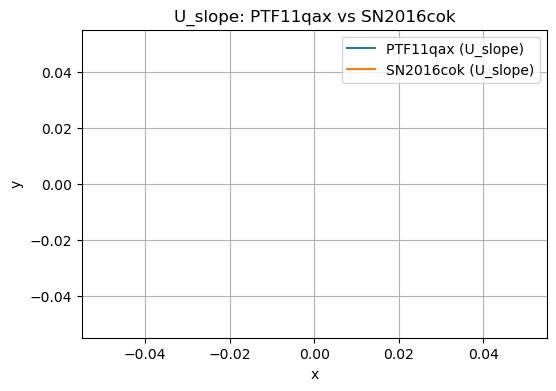

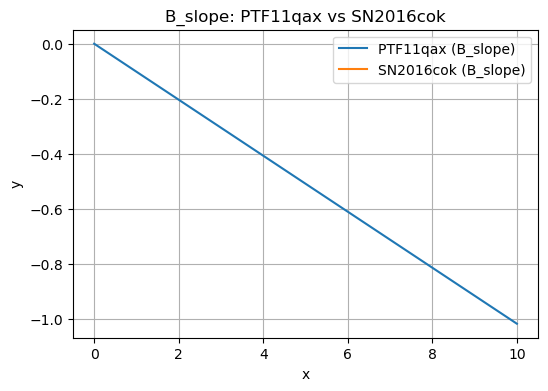

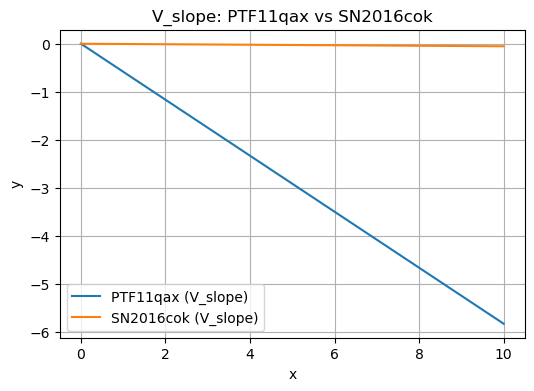

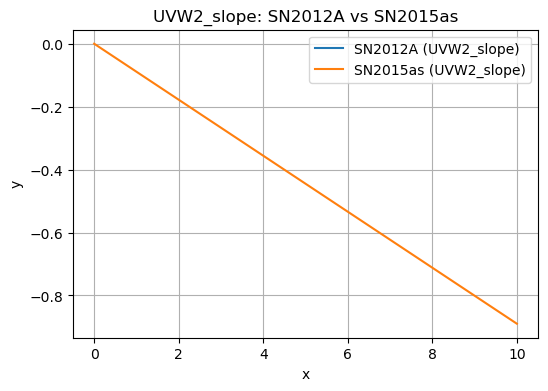

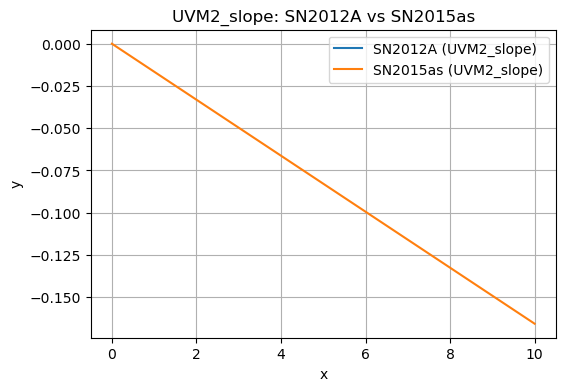

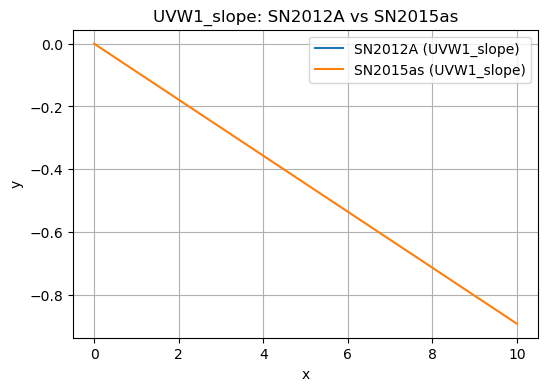

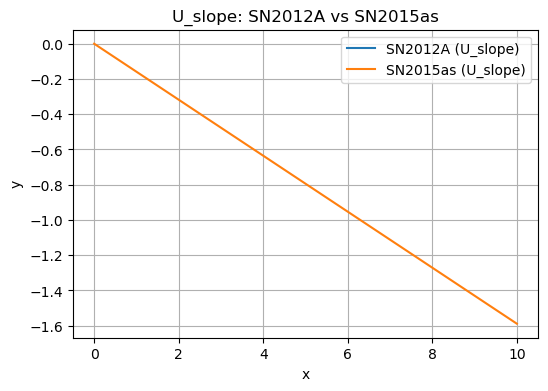

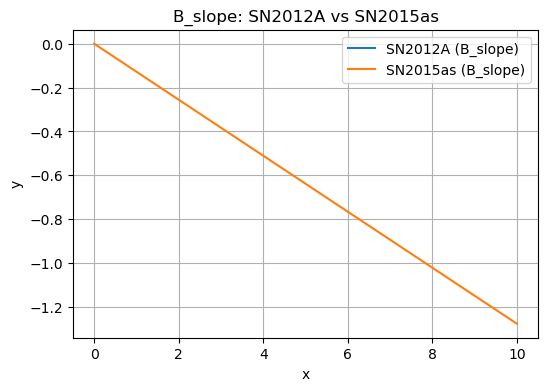

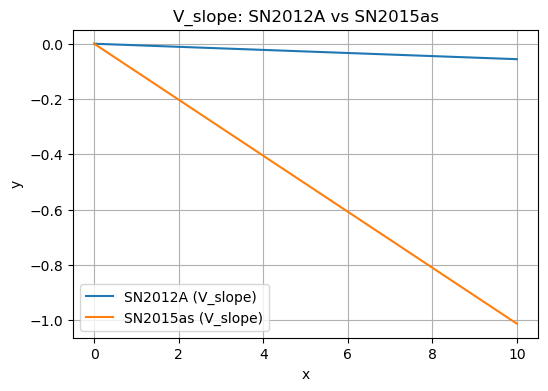

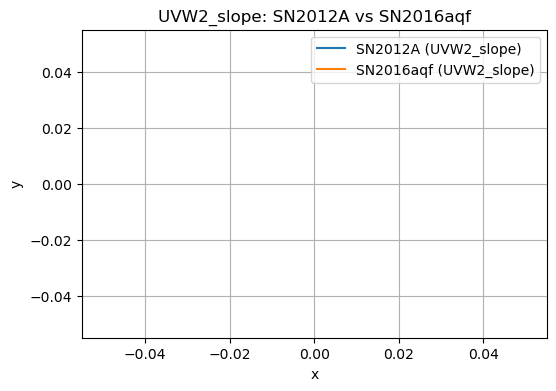

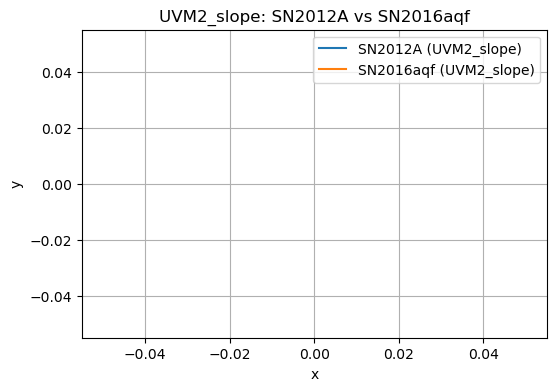

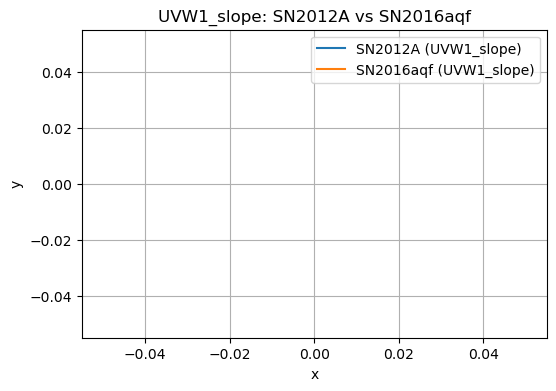

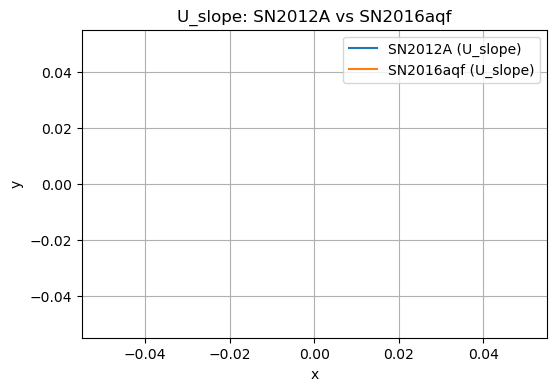

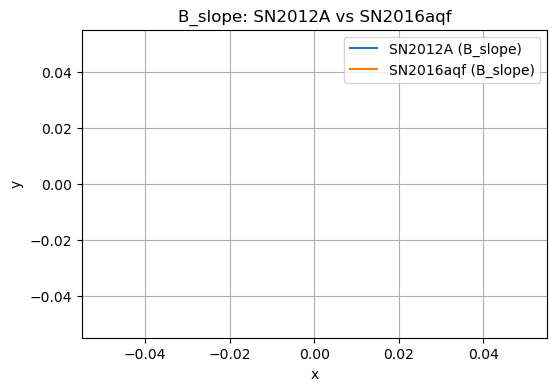

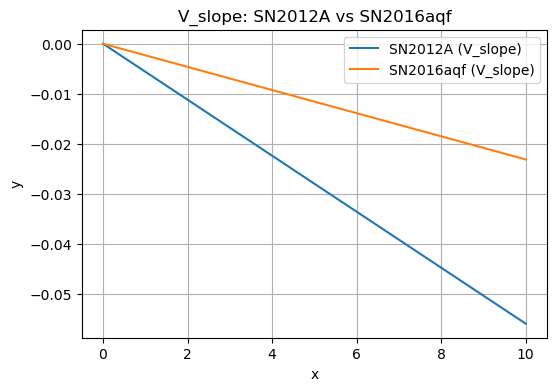

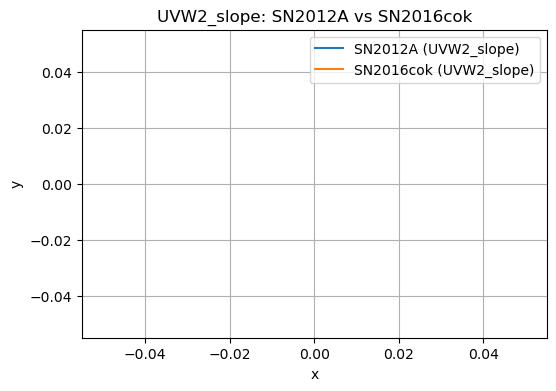

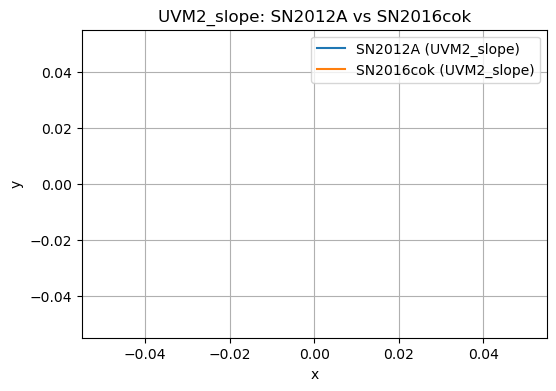

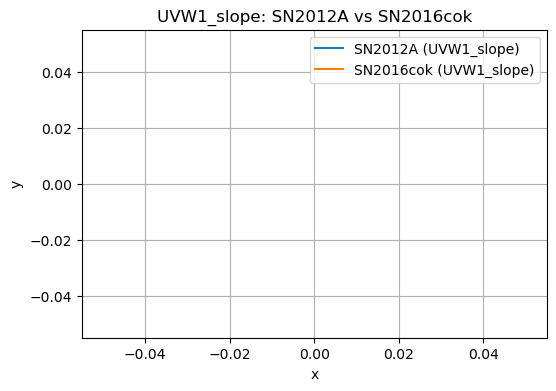

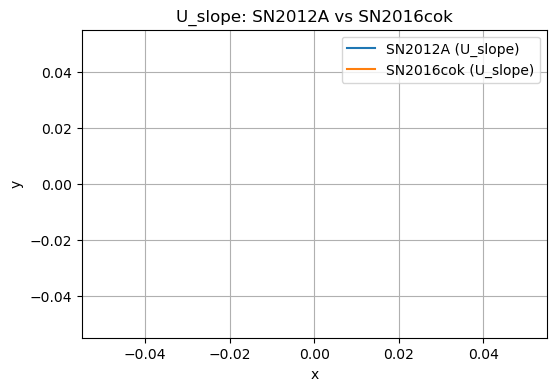

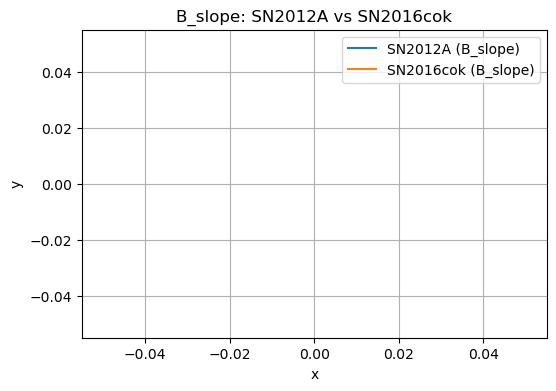

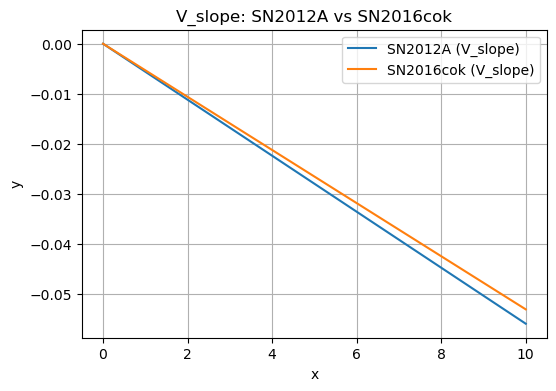

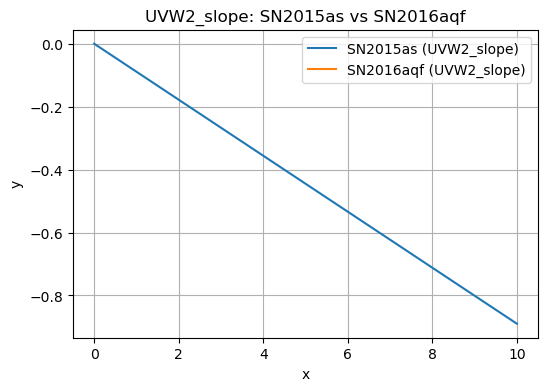

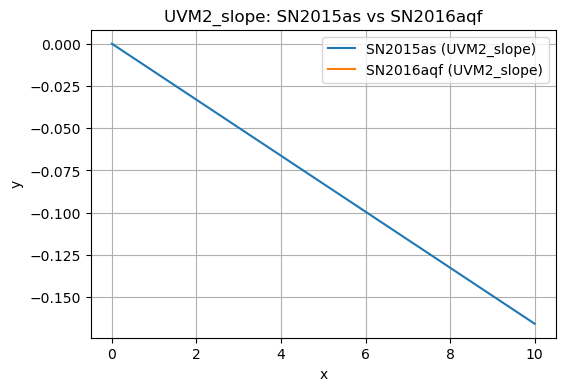

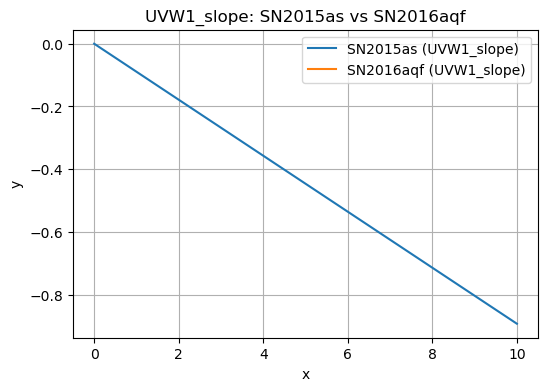

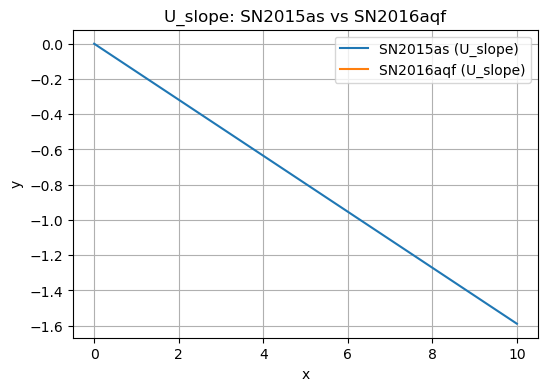

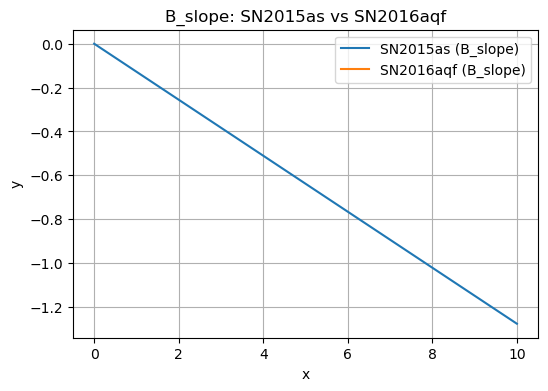

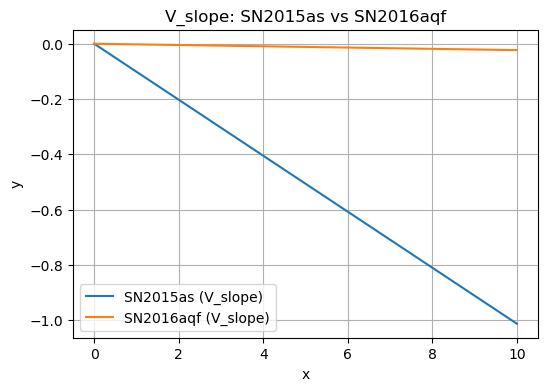

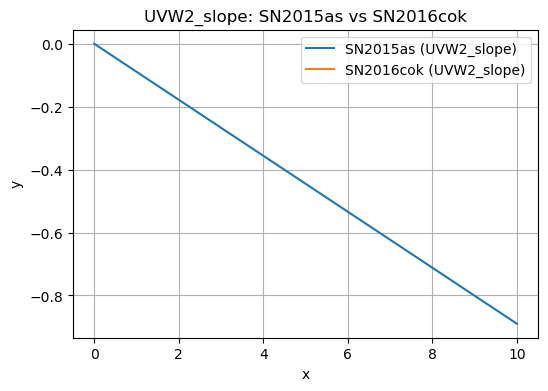

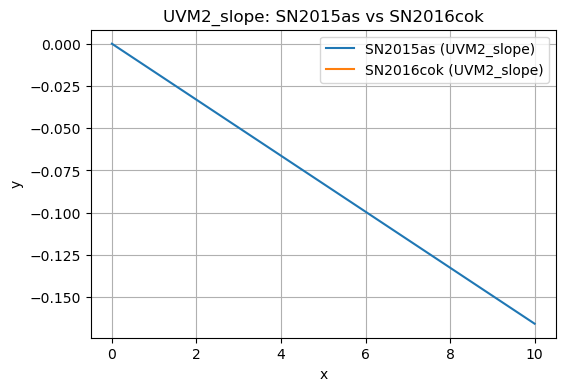

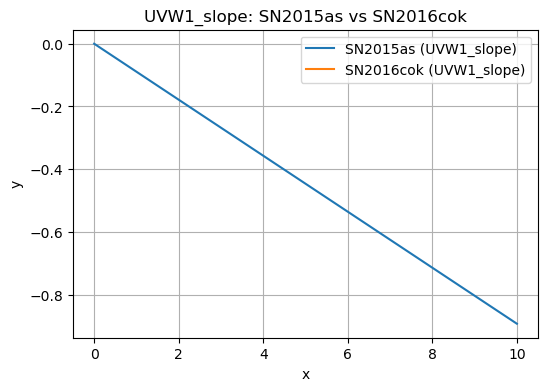

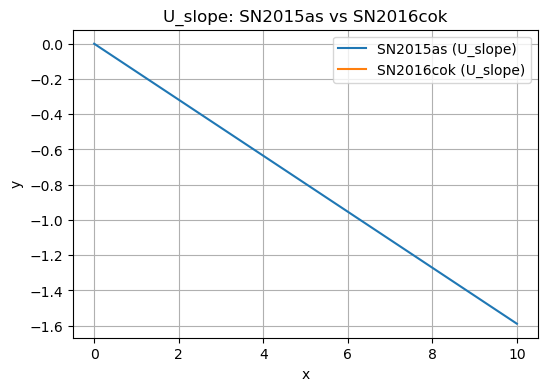

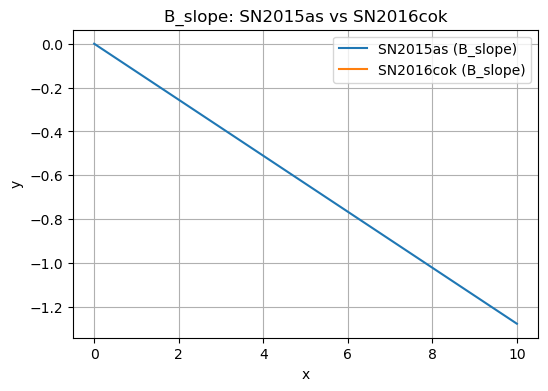

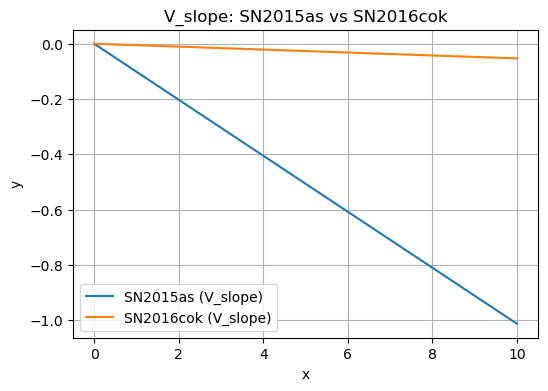

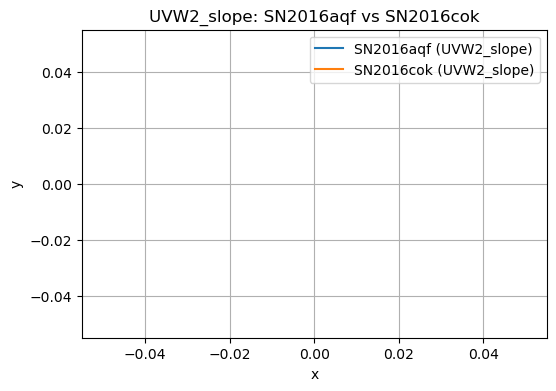

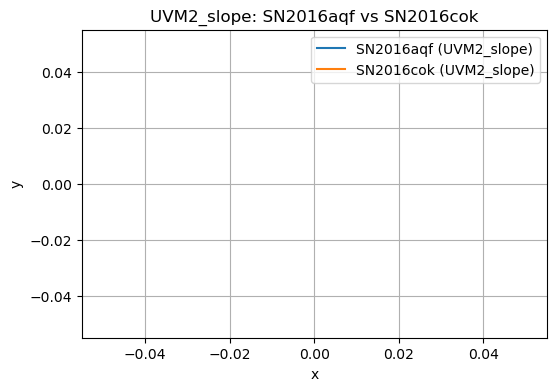

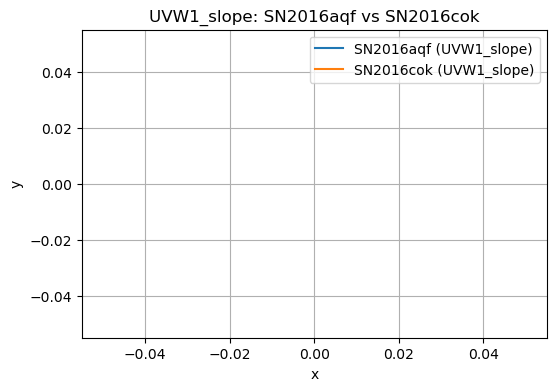

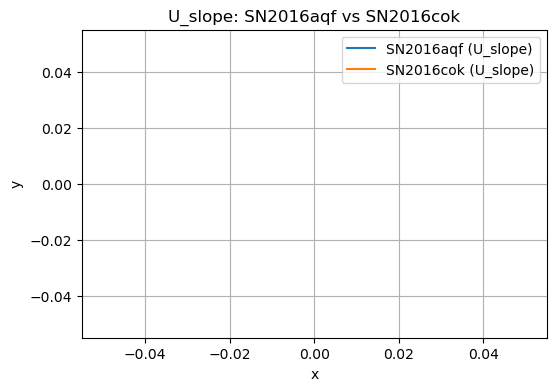

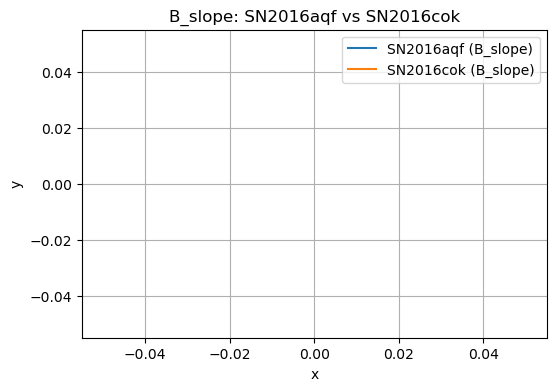

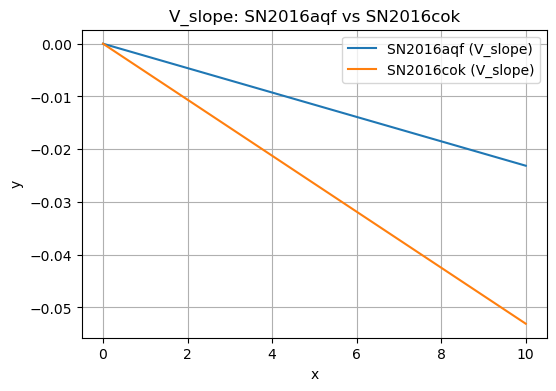

In [4]:
df = pd.read_csv("negative_slopes_wide.csv")

# Set SN Name as index
df.set_index("SN Name", inplace=True)

# Define x-range for plotting lines
x = np.linspace(0, 10, 100)  

#List of supernovae and filters
sne = df.index.tolist()
filters = df.columns.tolist()

# Loop over all pairs of SNe
#if plot only shows one line, one of the slopes were nan
#if both lines are absent, then both slopes were nan
for sn1, sn2 in combinations(sne, 2): #prevents duplicates 
    for filt in filters:
        slope1 = df.loc[sn1, filt]
        slope2 = df.loc[sn2, filt]
        
        plt.figure(figsize=(6,4))
        plt.plot(x, slope1*x, label=f"{sn1} ({filt})")
        plt.plot(x, slope2*x, label=f"{sn2} ({filt})")
        
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title(f"{filt}: {sn1} vs {sn2}")
        plt.legend()
        plt.grid(True)
        plt.show()